<a href="https://colab.research.google.com/github/NagaSowmyaSri/PRODIGY_ML_01/blob/main/prodigy_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
data_set=pd.read_csv(r"/content/gdrive/MyDrive/mall_dataset.csv")

In [ ]:
data_set.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data_set["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
data_set["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
data_set["Gender"]=le.fit_transform(data_set["Gender"])

In [ ]:
data_set.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
X_train1 = data_set[["Gender", "Age"]]

In [ ]:
X_train2 = data_set[["Gender", "Annual Income (k$)"]]

In [ ]:
X_train3 = data_set[["Gender", "Spending Score (1-100)"]]

<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

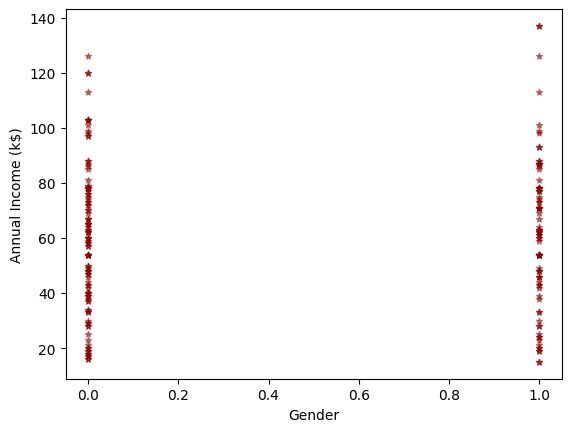

In [ ]:
X_train2.plot.scatter(x="Gender", y="Annual Income (k$)",
                     c="darkred", marker="*", alpha=.5)

<Axes: xlabel='Age', ylabel='Gender'>

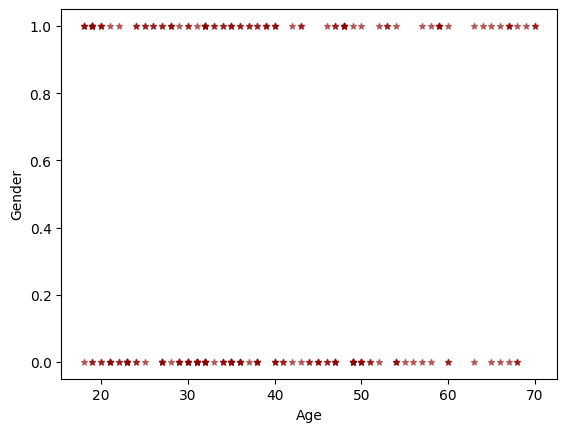

In [ ]:
X_train1.plot.scatter(x="Age", y="Gender",
                     c="darkred", marker="*", alpha=.5)

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

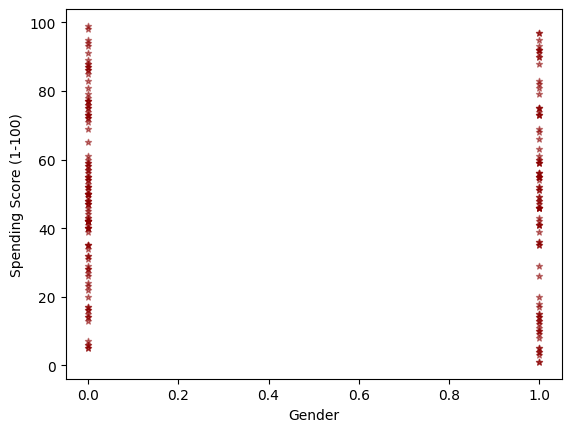

In [ ]:
X_train3.plot.scatter(x="Gender", y="Spending Score (1-100)",
                     c="darkred", marker="*", alpha=.5)

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(X_train3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
centroids = model.cluster_centers_
clusters = model.labels_
print(centroids)
print(clusters)

[[ 0.43103448 82.06896552]
 [ 0.41052632 48.35789474]
 [ 0.5106383  14.59574468]]
[1 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 1 0 2 0 2 0 1 1 2 0 2 0 2 0 2 0 2
 0 2 0 1 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 1 0 2 0 1 0
 2 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 1 0 2 0 1
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


<Axes: title={'center': 'mall clusterig'}, xlabel='Gender', ylabel='Spending Score (1-100)'>

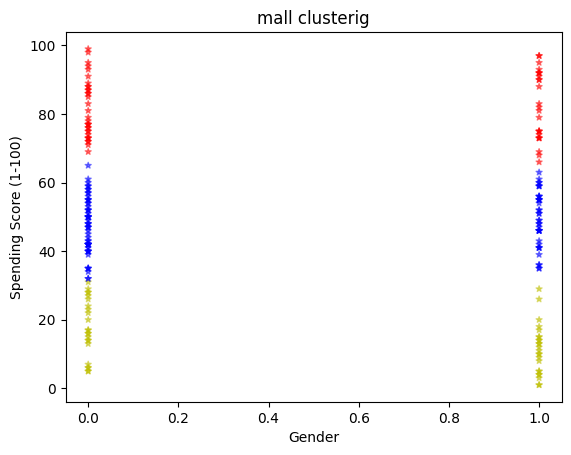

In [ ]:
clusters = pd.Series(clusters).map({
    0: "r",
    1: "b",
    2: "y"
})

X_train3.plot.scatter(x="Gender", y="Spending Score (1-100)",
                     c=clusters, marker="*", alpha=.5, title="mall clusterig")